In [6]:
!pip install matplotlib

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt


  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Matplotlib is building the font cache; this may take a moment.


# *Load the Dataset*

In [8]:

data = pd.read_csv("Creditcard_data.csv")
X = data.drop("Class", axis=1)
y = data["Class"]


# *Train-Test Split*

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# *Scaling*

In [17]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# *Define Models*

In [11]:

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}


# *Define Sampling Techniques*

In [12]:

sampling_techniques = {
    'Sampling1': RandomOverSampler(sampling_strategy='minority'),
    'Sampling2': RandomUnderSampler(sampling_strategy='majority'),
    'Sampling3': SMOTE(sampling_strategy='minority'),
    'Sampling4': ADASYN(sampling_strategy='minority'),
    'Sampling5': BorderlineSMOTE(sampling_strategy='minority')
}
n1 = 5000
n2 = 2000
n3 = 3000
n4 = 4000
n5 = 3500


# *Apply Sampling Techniques and Train Models*

In [18]:

results = {}
for sampler_name, sampler in sampling_techniques.items():
    
    if sampler_name == 'Sampling1':
        n = n1
    elif sampler_name == 'Sampling2':
        n = n2
    elif sampler_name == 'Sampling3':
        n = n3
    elif sampler_name == 'Sampling4':
        n = n4
    else:
        n = n5

    
    X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)

    
    if len(X_resampled) > n:
        X_resampled = X_resampled[:n]
        y_resampled = y_resampled[:n]

    
    for model_name, model in models.items():
        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)

       
        if model_name in results:
            results[model_name][sampler_name] = accuracy
        else:
            results[model_name] = {sampler_name: accuracy}


# *Display Results*

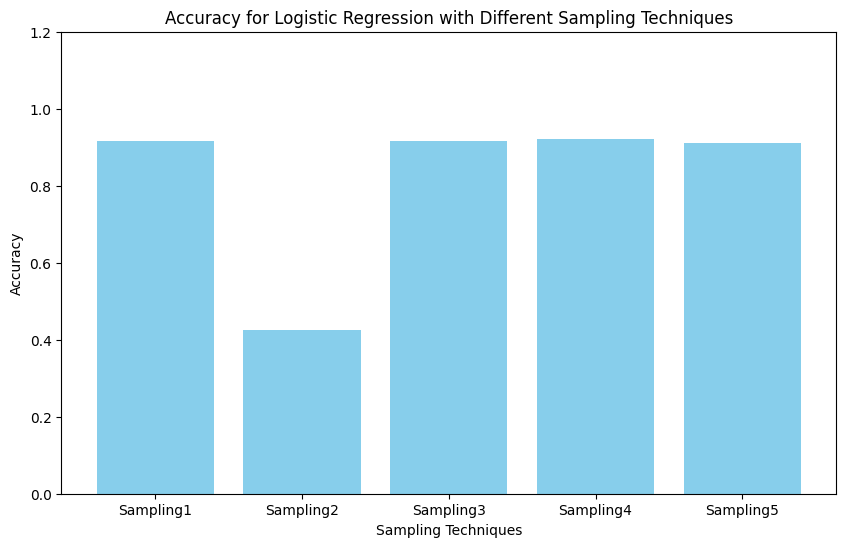

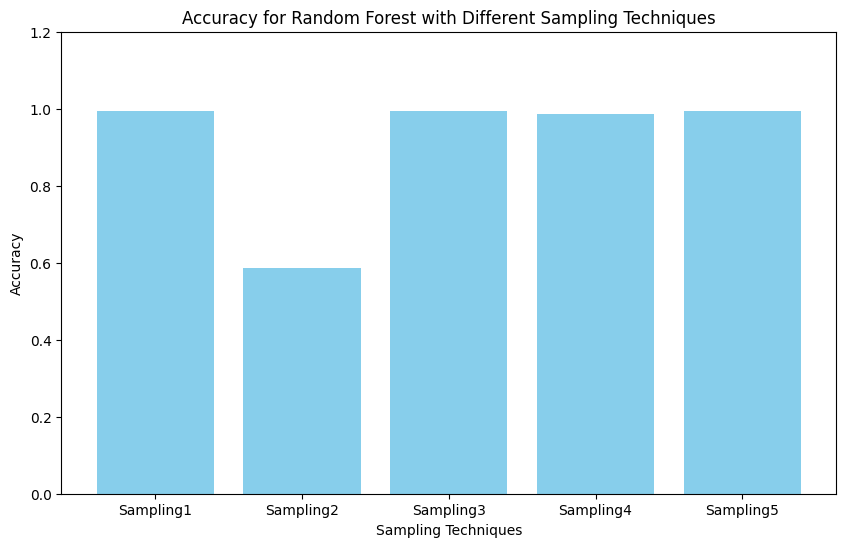

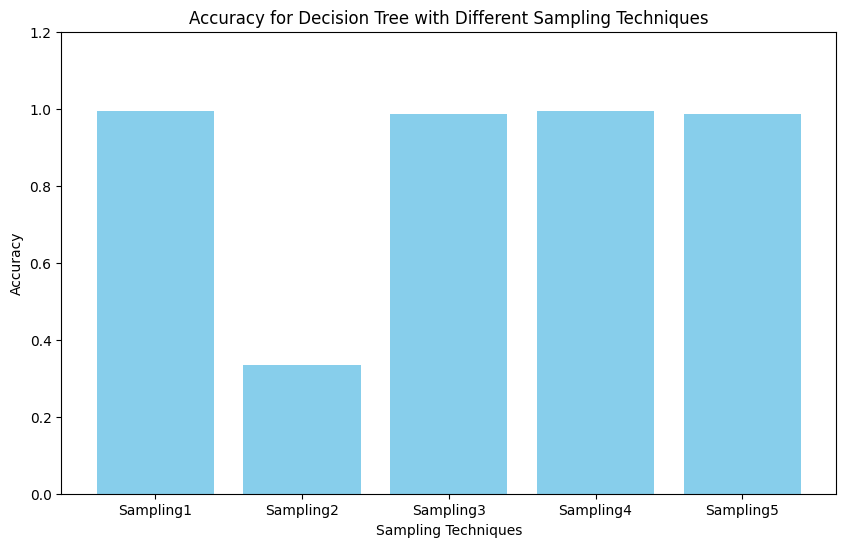

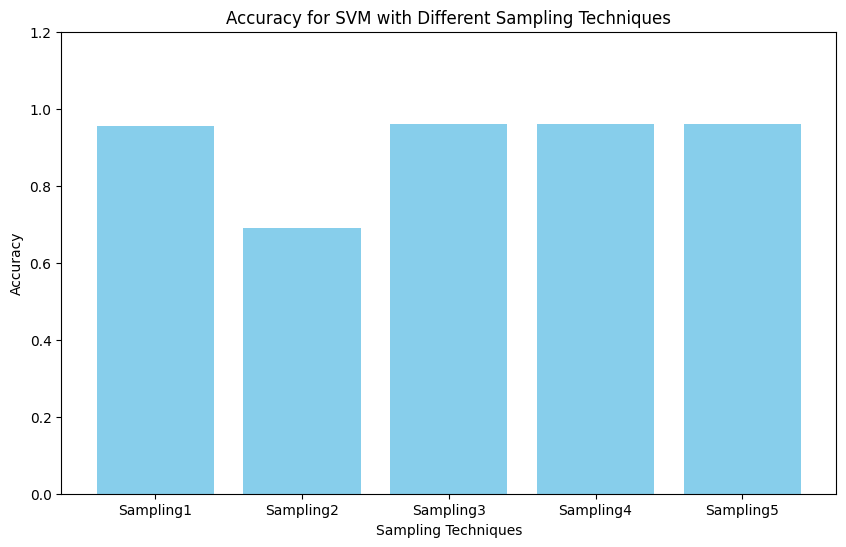

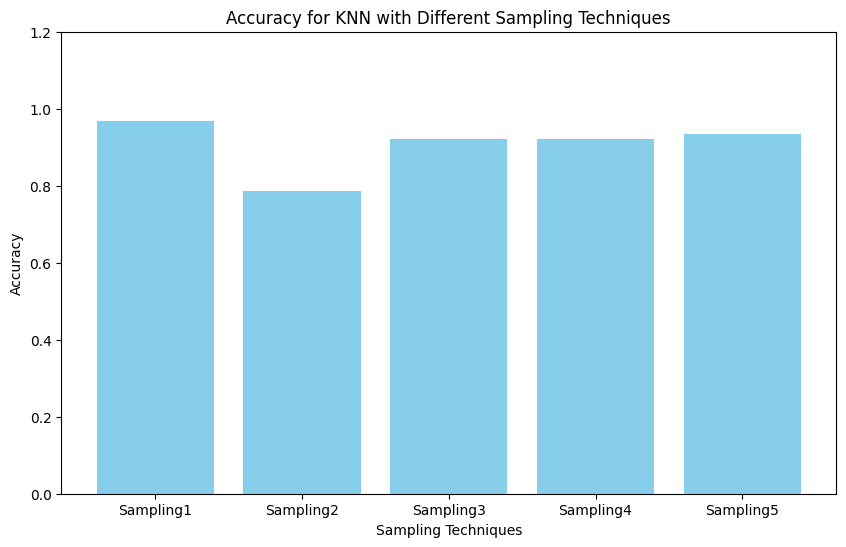

In [ ]:

for model_name in models.keys():
    plt.figure(figsize=(10, 6))
    plt.bar(results[model_name].keys(), results[model_name].values(), color='skyblue')
    plt.title(f'Accuracy for {model_name} with Different Sampling Techniques')
    plt.xlabel('Sampling Techniques')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.2)
    plt.show()


In [19]:

print('Results:')
print('        Sampling1   Sampling2   Sampling3   Sampling4   Sampling5')
for model_name, model_results in results.items():
    print(model_name, end='')
    for sampler_name in sampling_techniques.keys():
        if sampler_name in model_results:
            print(f'    {model_results[sampler_name]:.4f}   ', end='')  
        else:
            print('              ', end='')  
    print()


max_accuracy_model = None
max_accuracy_sampling = None
max_accuracy = 0

for model_name, sampling_dict in results.items():
    for sampling_name, accuracy in sampling_dict.items():
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            max_accuracy_model = model_name
            max_accuracy_sampling = sampling_name


print(f"Maximum Accuracy: {max_accuracy:.2%}")  
print(f"Corresponding Sampling Technique: {max_accuracy_sampling}")
print(f"Corresponding Model: {max_accuracy_model}")
print('=' * 40)


Results:
        Sampling1   Sampling2   Sampling3   Sampling4   Sampling5
Logistic Regression    0.9161       0.4516       0.9226       0.9226       0.9097   
Random Forest    0.9935       0.4065       0.9935       0.9935       0.9935   
Decision Tree    0.9935       0.7806       0.9935       0.9935       0.9935   
SVM    0.9548       0.8968       0.9613       0.9613       0.9613   
KNN    0.9677       0.6387       0.9226       0.9290       0.9355   
Maximum Accuracy: 99.35%
Corresponding Sampling Technique: Sampling1
Corresponding Model: Random Forest
